In [3]:
from datasets import load_dataset

dataset = load_dataset("beans")
print(dataset)


c:\Users\dumas\PycharmProjects\DeepLearning\.envdeep\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\dumas\.cache\huggingface\hub\datasets--beans. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating test split: 100%|██████████| 128/128 [00:00<00:00, 4821.56 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})


In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

data_path = "SportsImageClassification"
batch_size = 32
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ==== Transformations ====
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  
])

train_data = datasets.ImageFolder(f"{data_path}/train", transform=transform)
valid_data = datasets.ImageFolder(f"{data_path}/valid", transform=transform)
test_data  = datasets.ImageFolder(f"{data_path}/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader  = DataLoader(test_data, batch_size=batch_size)

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))  
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"[{epoch+1}/{num_epochs}] Loss: {total_loss/len(train_loader):.4f}")

model.eval()
correct = total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

print(f"✅ Test Accuracy: {correct/total:.2%}")


c:\Users\dumas\PycharmProjects\DeepLearning\.envdeep\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dumas\PycharmProjects\DeepLearning\.envdeep\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\dumas/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 57.1MB/s]


[1/5] Loss: 1.8563
[2/5] Loss: 0.4395
[3/5] Loss: 0.1274
[4/5] Loss: 0.0413
[5/5] Loss: 0.0194
✅ Test Accuracy: 98.00%


In [33]:
import pickle

torch.save(model.state_dict(), "resnet_model.pth")

with open("class_names.pkl", "wb") as f:
    pickle.dump(train_data.classes, f)

print("✅ Modèle et classes sauvegardés pour Streamlit.")


✅ Modèle et classes sauvegardés pour Streamlit.


In [34]:
print(train_data.classes[42]) 


horse jumping


In [5]:
from glob import glob

train_imgs = set(glob(f"{data_path}/train/*/*.jpg"))
test_imgs  = set(glob(f"{data_path}/test/*/*.jpg"))

# Comparer les noms de fichiers
overlap = train_imgs & test_imgs
print(f"Images en commun entre train et test : {len(overlap)}")


Images en commun entre train et test : 0


In [6]:
from collections import Counter

print("Répartition train :", Counter([label for _, label in train_data]))
print("Répartition test  :", Counter([label for _, label in test_data]))


Répartition train : Counter({31: 191, 32: 190, 58: 189, 7: 174, 41: 172, 8: 169, 59: 167, 71: 166, 18: 164, 68: 163, 69: 159, 40: 158, 26: 157, 29: 157, 36: 157, 64: 157, 66: 157, 85: 157, 92: 156, 28: 151, 53: 151, 35: 150, 52: 150, 16: 149, 73: 149, 78: 148, 5: 147, 39: 147, 80: 147, 11: 145, 72: 144, 70: 143, 84: 142, 93: 142, 23: 141, 67: 141, 86: 141, 12: 140, 43: 139, 13: 138, 63: 138, 45: 136, 50: 136, 81: 136, 25: 135, 88: 135, 22: 134, 30: 134, 42: 134, 96: 134, 75: 133, 83: 133, 2: 132, 49: 132, 56: 132, 19: 131, 33: 131, 60: 131, 87: 131, 47: 130, 74: 130, 76: 130, 95: 130, 21: 129, 27: 128, 54: 128, 90: 128, 55: 127, 17: 125, 89: 125, 6: 123, 24: 123, 37: 122, 82: 122, 38: 121, 14: 120, 20: 120, 65: 120, 98: 119, 34: 118, 51: 118, 61: 118, 79: 117, 15: 116, 4: 113, 0: 112, 1: 112, 48: 112, 62: 112, 57: 111, 10: 110, 9: 108, 46: 108, 97: 106, 94: 103, 44: 102, 3: 99, 99: 98, 91: 97, 77: 59})
Répartition test  : Counter({0: 5, 1: 5, 2: 5, 3: 5, 4: 5, 5: 5, 6: 5, 7: 5, 8: 5, 9

In [7]:
correct_val = total_val = 0
with torch.no_grad():
    for images, labels in valid_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        correct_val += (preds == labels).sum().item()
        total_val += labels.size(0)

print(f"📊 Validation Accuracy: {correct_val / total_val:.2%}")


📊 Validation Accuracy: 96.20%


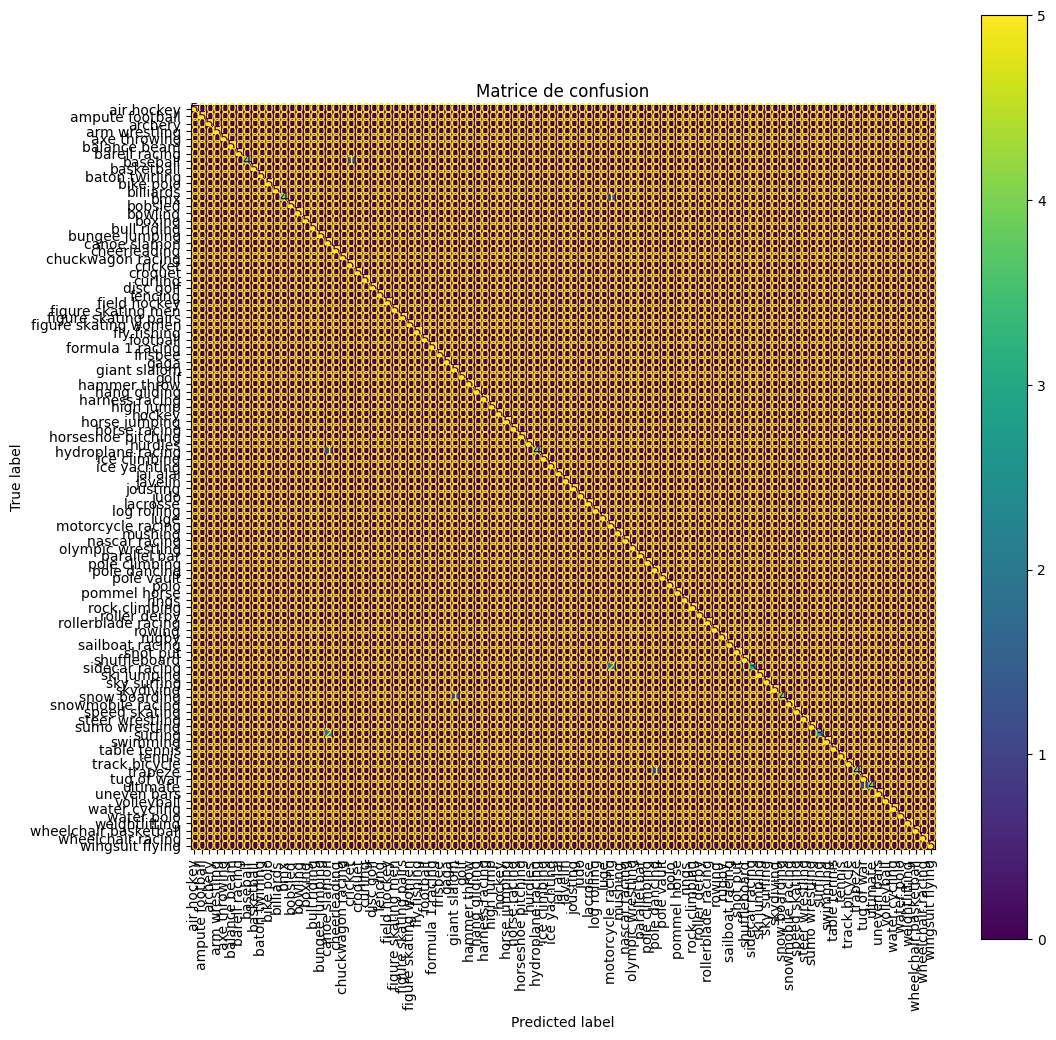

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_data.classes)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90)
plt.title("Matrice de confusion")
plt.show()


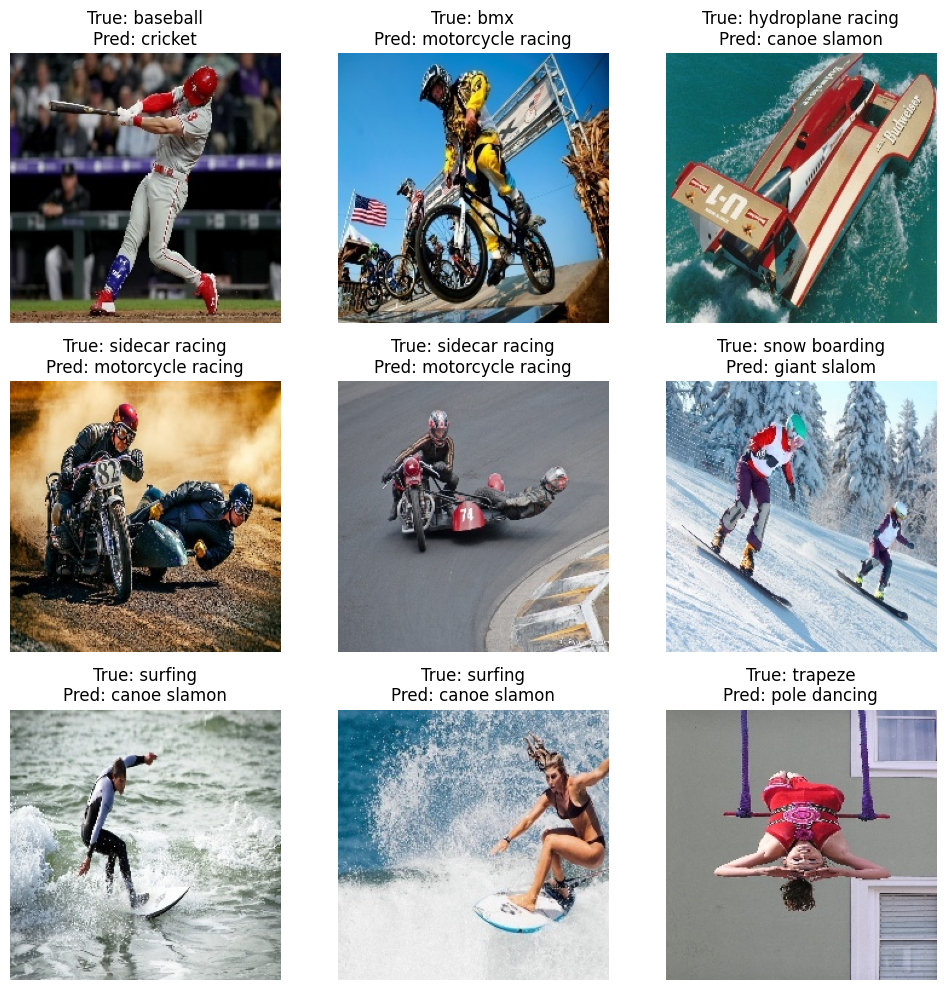

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

model.eval()
errors = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        for img, label, pred in zip(images, labels, preds):
            if label != pred:
                errors.append((img.cpu(), label.item(), pred.item()))

fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for ax, (img, label, pred) in zip(axs.flat, errors[:9]):
    ax.imshow(img.permute(1, 2, 0) * 0.5 + 0.5)  
    ax.set_title(f"True: {test_data.classes[label]}\nPred: {test_data.classes[pred]}")
    ax.axis("off")
plt.tight_layout()
plt.show()


In [31]:
import numpy as np

y_true = np.array(y_true)
y_pred = np.array(y_pred)
per_class_accuracy = {}

for i, class_name in enumerate(test_data.classes):
    mask = y_true == i
    correct = (y_pred[mask] == i).sum()
    total = mask.sum()
    acc = correct / total if total > 0 else 0
    per_class_accuracy[class_name] = acc

sorted_acc = sorted(per_class_accuracy.items(), key=lambda x: x[1])
for cls, acc in sorted_acc[:10]:
    print(f"{cls:25s} : {acc:.2%}")


sidecar racing            : 60.00%
surfing                   : 60.00%
baseball                  : 80.00%
bmx                       : 80.00%
hydroplane racing         : 80.00%
snow boarding             : 80.00%
trapeze                   : 80.00%
ultimate                  : 80.00%
air hockey                : 100.00%
ampute football           : 100.00%


📊 Répartition des classes (train)


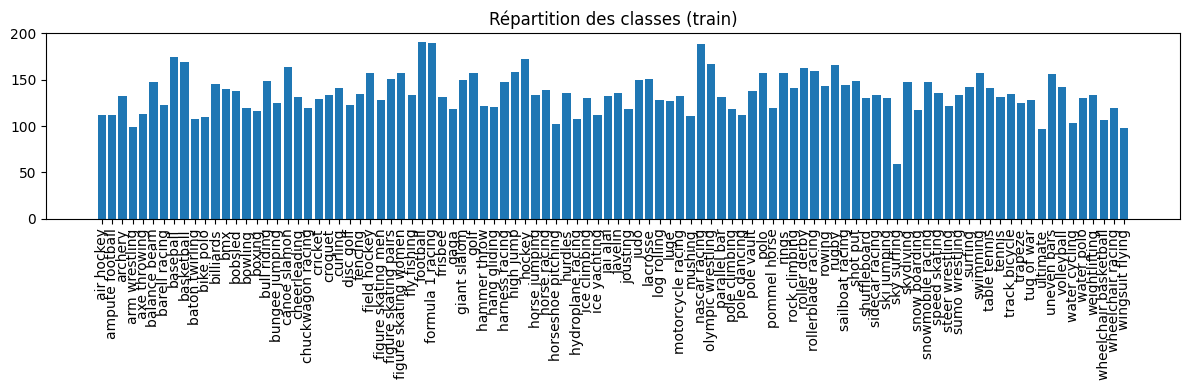

In [32]:
train_data = datasets.ImageFolder(f"{data_path}/train", transform=transform)
valid_data = datasets.ImageFolder(f"{data_path}/valid", transform=transform)
test_data  = datasets.ImageFolder(f"{data_path}/test", transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader  = DataLoader(test_data, batch_size=batch_size)

def plot_class_distribution(data, title):
    labels = [label for _, label in data]
    counter = Counter(labels)
    classes = data.classes
    dist = {classes[i]: counter[i] for i in counter}
    
    plt.figure(figsize=(12, 4))
    plt.bar(dist.keys(), dist.values())
    plt.xticks(rotation=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()

print("📊 Répartition des classes (train)")
plot_class_distribution(train_data, "Répartition des classes (train)")


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
from sklearn.metrics import classification_report

data_path = "SportsImageClassification"
batch_size = 32
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(train_data.classes))
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"[{epoch+1}/{num_epochs}] Loss: {total_loss/len(train_loader):.4f}")

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f"\n✅ Test Accuracy: {accuracy:.2%}")


c:\Users\dumas\PycharmProjects\DeepLearning\.envdeep\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\dumas\PycharmProjects\DeepLearning\.envdeep\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:

per_class_accuracy = {}
y_true = np.array(y_true)
y_pred = np.array(y_pred)

for i, class_name in enumerate(test_data.classes):
    mask = y_true == i
    correct = (y_pred[mask] == i).sum()
    total = mask.sum()
    acc = correct / total if total > 0 else 0
    per_class_accuracy[class_name] = acc

print("\n🔍 Classes les plus difficiles :")
sorted_acc = sorted(per_class_accuracy.items(), key=lambda x: x[1])
for cls, acc in sorted_acc[:10]:
    print(f"{cls:25s} : {acc:.2%}")

torch.save(model.state_dict(), "resnet_model.pth")
with open("class_names.pkl", "wb") as f:
    pickle.dump(train_data.classes, f)

print("\n💾 Modèle et noms de classes sauvegardés pour Streamlit.")
